## 1.- Packages

In [74]:
!pip install econml
!pip install pdflatex
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from econml.metalearners import XLearner
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
dir = '/content/gdrive/My Drive/plots'

## 2.- Data

### Load the data

In [76]:
jobs = pd.read_csv('https://raw.githubusercontent.com/A-ngelG/CE888/main/project/data/jobs.csv')
ihdp = pd.read_csv('https://raw.githubusercontent.com/A-ngelG/CE888/main/project/data/ihdp.csv')

### Visualize data tables
This helps to give insight on the variables in each column and whether they are continuos or binary.

In [77]:
print('jobs')
jobs

jobs


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,1.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0.0,0.0,0.0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0.0,1.0,0.0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0.0,1.0,0.0
3210,0.702982,0.101835,0.0,0.0,1.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0.0,1.0,0.0


In [78]:
print('ihdp')
ihdp

ihdp


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


### IHDP


#### General information
yf stands for factual

tfc for counterfactual

t for treatment

x for background variables


In [79]:
print(ihdp.info()) #printed to check if there is by chance some missing data
print(ihdp.shape) #used to check the size of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [80]:
ihdp.describe() #helps to see ranges of each of the columns, and gives insight on the outcomes and individual treatment effect.

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,3.626431e-17,2.348263e-17,-4.666801e-17,-9.012574e-16,4.518177e-17,-7.251376e-16,0.514056,0.093708,0.520750,0.364123,0.269076,0.219545,0.358768,0.463186,0.140562,0.959839,0.594378,0.963855,0.135207,0.135207,0.156627,0.081660,0.073628,0.128514,0.157965,0.186078,3.159538,5.696107,4.016067
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500137,0.291618,0.499904,0.481506,0.443777,0.414216,0.479960,0.498977,0.347802,0.196467,0.491341,0.186775,0.342174,0.342174,0.363692,0.274029,0.261339,0.334886,0.364953,0.389430,2.179956,1.980121,0.859736
min,-2.731287e+00,-3.800823e+00,-1.850350e+00,-8.796060e-01,-5.130428e+00,-1.851480e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.543902,-1.037628,-1.866989
25%,-6.669461e-01,-6.027100e-01,-7.332610e-01,-8.796060e-01,-5.666720e-01,-8.577868e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626779,5.053598,3.775936
50%,1.652752e-01,1.968181e-01,-3.608980e-01,1.617025e-01,1.210172e-01,-2.970882e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.577294,6.209686,4.304433
75%,8.137593e-01,5.965822e-01,7.561910e-01,1.617025e-01,6.836721e-01,6.327536e-01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.494637,6.948922,4.569454
max,1.505476e+00,2.595403e+00,2.990369e+00,2.244320e+00,2.371637e+00,2.951372e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.268228,10.171004,4.670125


In [81]:
print(ihdp['t'].value_counts()) #to check how imbalanced the treatment column is

0.0    608
1.0    139
Name: t, dtype: int64


Following code for creating and exporting graph

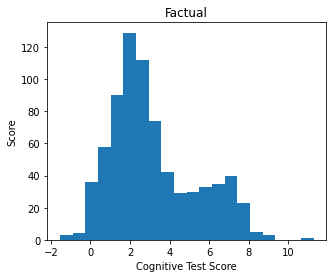

In [82]:
fig,ax = plt.subplots(figsize=(5,4))
ax.hist(ihdp['yf'], bins=20)
ax.set_xlabel('Cognitive Test Score')
ax.set_ylabel('Score')
ax.set_title("Factual")
fig1 = plt.gcf()
fig1.savefig(f'{dir}histogram.pdf')
plt.show()

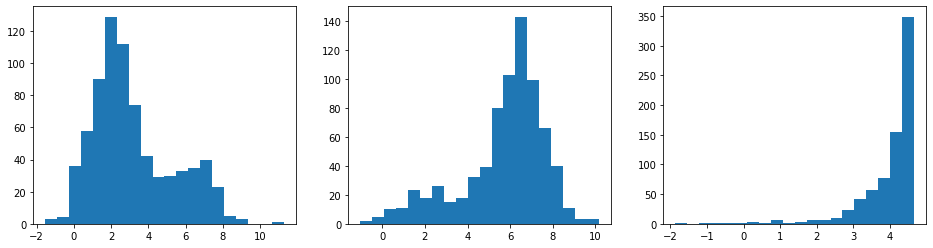

In [83]:
fig,axs = plt.subplots(1, 3, figsize=(16,4)) #basic data visualization, looking for skewed data, ando ther outliners
axs[0].hist(ihdp['yf'], bins=20)
axs[1].hist(ihdp['ycf'], bins=20)
axs[2].hist(ihdp['ite'], bins=20)
plt.show()

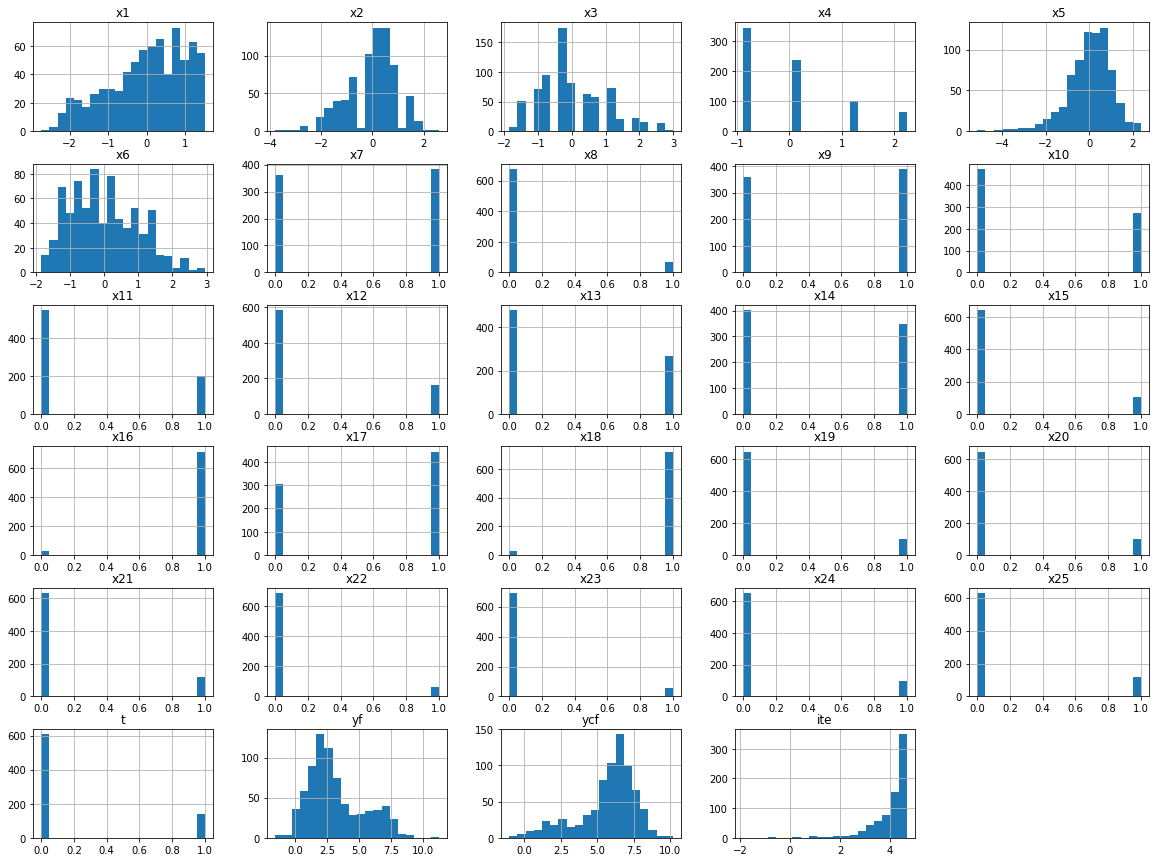

In [84]:
_ = ihdp.hist(bins=20, figsize=(20,15)) #basic data visualization of the features

#### Preprocessing
Data split for training and validation, then preprocessed with standardscaler, take in consideration that ycf and ite will only be used for evaluation.

In [85]:
xi = ihdp.drop(columns = ['yf'] and ['ycf'] and ['t'] and ['ite'])
ti = ihdp['t']
yf = ihdp['yf']
ycf = ihdp['ycf']
Tite = ihdp['ite']
xi_train, xi_test, ti_train, ti_test, yf_train, yf_test,ycf_train, ycf_test, ite_train, ite_test = train_test_split(xi, ti, yf, ycf, Tite, test_size=0.2)
scaler_x = StandardScaler()
xi_train = scaler_x.fit_transform(xi_train)
xi_test = scaler_x.transform(xi_test)

### Jobs
t for treatment

y for factuals

x for background

e whether data was observational or experimental


In [86]:
print(jobs.info()) #printed to check if there is by chance some missing data
print(jobs.shape) #used to check the size of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB
None
(3212, 20)


In [87]:
jobs.describe() #helps to see ranges of each of the columns, and gives insight on the outcomes and individual treatment effect.

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
count,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3.212000e+03,3212.000000,3212.000000,3.212000e+03,3212.000000,3212.000000,3212.000000,3212.000000
mean,2.382901e-16,-3.820971e-16,0.374222,0.048879,0.707970,0.411893,-1.200783e-16,4.956600e-17,-6.083414e-18,1.757408e-14,-2.638422e-16,-1.168292e-17,9.429291e-17,0.168742,0.167497,1.901758e-16,0.010897,0.092466,0.849938,0.224782
std,1.000000e+00,1.000000e+00,0.483997,0.215649,0.454767,0.492253,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.374582,0.373477,1.000000e+00,0.103833,0.289727,0.357188,0.417504
min,-1.461095e+00,-3.986840e+00,0.000000,0.000000,0.000000,0.000000,-1.147411e+00,-1.110467e+00,-1.164047e+00,-9.488316e-01,-2.143974e+00,-5.580568e-01,-5.188151e-01,0.000000,0.000000,-9.799811e-01,0.000000,0.000000,0.000000,0.000000
25%,-8.024627e-01,-5.796108e-01,0.000000,0.000000,0.000000,0.000000,-8.923385e-01,-9.139141e-01,-7.852843e-01,-7.434072e-01,-6.707297e-01,-5.423814e-01,-5.098380e-01,0.000000,0.000000,-8.142367e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.320111e-01,1.018350e-01,0.000000,0.000000,1.000000,0.000000,-8.521244e-02,-8.346011e-02,-4.355556e-01,-4.998533e-01,-2.250229e-02,-2.862214e-01,-2.737369e-01,0.000000,0.000000,-2.035020e-01,0.000000,0.000000,1.000000,0.000000
75%,7.970728e-01,4.425579e-01,1.000000,0.000000,1.000000,1.000000,5.506613e-01,5.629081e-01,6.730184e-01,5.267384e-01,3.458087e-01,1.366588e-01,1.318304e-01,0.000000,0.000000,4.539777e-01,0.000000,0.000000,1.000000,0.000000
max,2.114337e+00,1.805449e+00,1.000000,1.000000,1.000000,1.000000,8.751987e+00,1.016507e+01,2.446737e+00,2.773336e+00,2.113702e+00,2.305284e+01,2.902264e+01,1.000000,1.000000,7.136030e+00,1.000000,1.000000,1.000000,1.000000


In [88]:
print(jobs['y'].value_counts())#to check how imbalanced the treatment column is
print(jobs['e'].value_counts())#to check how imbalanced the treatment column is

1.0    2730
0.0     482
Name: y, dtype: int64
0.0    2490
1.0     722
Name: e, dtype: int64


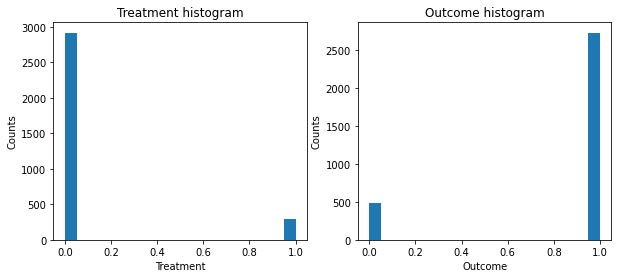

In [89]:
bins=20
fig,axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(jobs['t'], bins=bins)
axs[1].hist(jobs['y'], bins=bins)
axs[0].set_xlabel('Treatment')
axs[0].set_ylabel('Counts')
axs[0].set_title("Treatment histogram")
axs[1].set_xlabel('Outcome')
axs[1].set_ylabel('Counts')
axs[1].set_title("Outcome histogram")
fig2 = plt.gcf()
fig2.savefig(f'{dir}subplot.pdf')
plt.show()
#Grafical means for checking whether the data is skewed/imbalanced

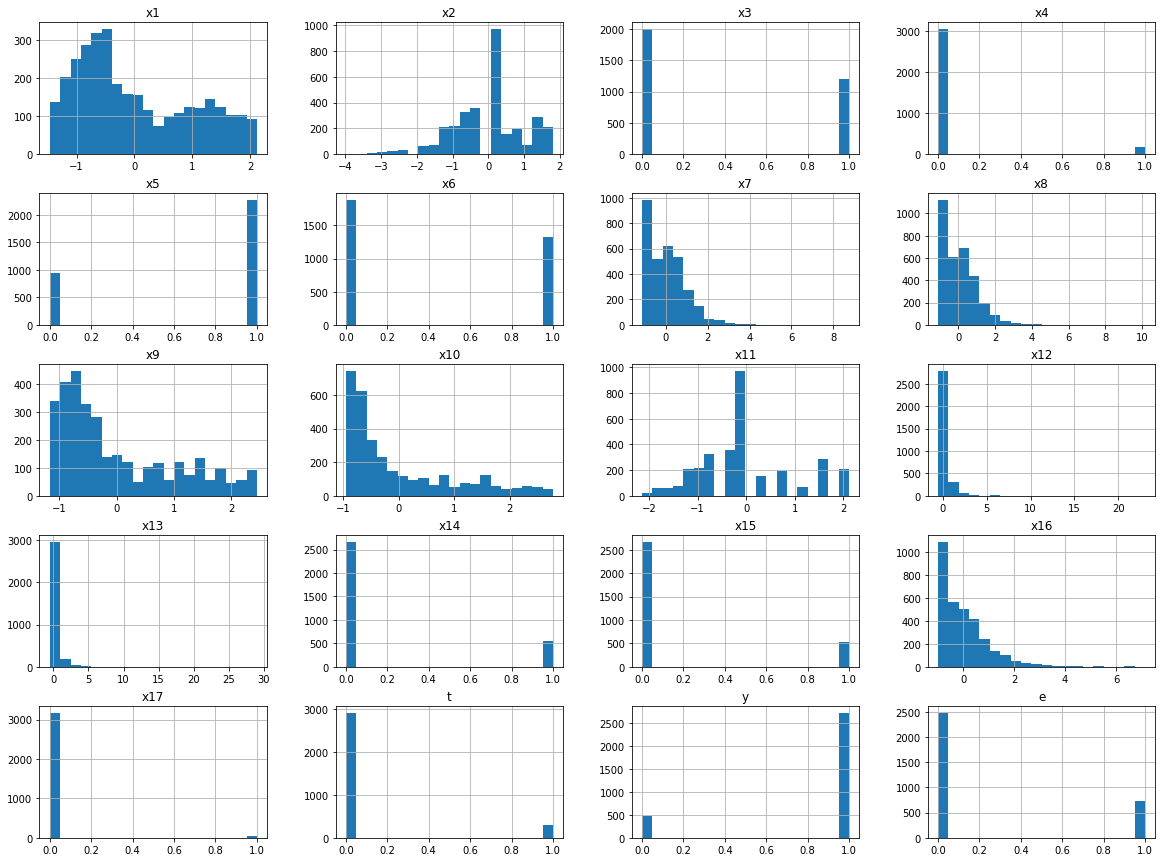

In [90]:
_ = jobs.hist(bins=20, figsize=(20,15))  #basic data visualization, looking for skewed data, and other outliners

#### Preprocessing
Data split for training and validation, then preprocessed with standardscaler.


In [91]:
xj = jobs.drop(columns = ['y'] and ['e'] and ['t'] )
tj = jobs['t']
yj = jobs['y']
e = jobs['e']

xj_train, xj_test, tj_train, tj_test, yj_train, yj_test, e_train, e_test = train_test_split(xj, tj, yj, e, test_size=0.2)
scaler_xj = StandardScaler()
xj_train = scaler_xj.fit_transform(xj_train)
xj_test = scaler_xj.transform(xj_test)